# Graphing results for CD and comparing to UC
The figures produced from this file were edited in Inkscape for more user-friendly visualization.

## 0. Get the colors and set up ready

In [1]:
meta_colors_epi <- c("Immature Goblet"="#7D86Ba", "Goblet"="#BC79AC", 
                 "TA 1"="#4A69A5",  "TA 2"="#629F3F", 
                 "Cycling TA"="#6A2A81",  "Secretory TA"="#CA7953",
                 "Immature Enterocytes 1"="#C46A1F", "Immature Enterocytes 2"="#D2D05D", 
                 "Enteroendocrine"="#272727", "Enterocyte Progenitors"="#7f4521", 
                 "Best4+ Enterocytes"="#79B193", "Enterocytes"="#A7C6E6", 
                 "Stem"="#B01C20","Tuft"="#9DBF4A", 
                 "M cells"="#878787")
meta_colors_fib <- c('WNT2B+ Fos-lo 1'='#4b67a3', 'WNT2B+ Fos-lo 2'='#66a141', 
                   'WNT2B+ Fos-hi'='#ae1e24', 
                   'WNT5B+ 1'='#c7661c', 'WNT5B+ 2'='#d2d35b', 
                   'Myofibroblasts'='#a5c3e2', 'RSPO3+'='#6f3b85', 
                   'Inflammatory Fibroblasts'='#7d492a')
meta_colors_b <- c("Plasma" = "#A6CEE3", "Cycling B" = "#B2DF8A", 
                   "Follicular" = "#FF7F00", "GC" = "#1F78B4")

meta_colors_t <- c("MT-hi" = "#A6CEE3", "Cycling T" = "#1F78B4", 
                 "NKs" = "#B2DF8A", "ILCs" = "#33A02C", 
                 "CD8+ IELs" = "#FB9A99", "CD8+ LP" = "#E31A1C", 
                 "CD8+ IL17+" = "#FDBF6F", 
                 "CD4+ Activated Fos-hi" = "#CAB2D6", "CD4+ Activated Fos-lo" = "#6A3D9A", 
                 "CD4+ Memory" = "#FFFF99", "CD4+ PD1+" = "#B15928", 
                 "Tregs" = "#B3E2CD")

meta_colors_my <- c("Macrophages" = "#A6CEE3", "DC1" = "#1F78B4", 
                 "DC2" = "#B2DF8A", "CD69+ Mast" = "#33A02C", 
                 "CD69- Mast" = "#FB9A99", "Cycling Monocytes" = "#E31A1C", 
                 "Inflammatory Monocytes" = "#FDBF6F")

meta_colors_end <- c("Endothelial" = "#868686", 
                     "Microvascular" = "#78b392",
                     "Post-capillary Venules" = "#c97b51", 
                     "Pericytes" = "#7f87bc")
meta_colors_glia <- c("Glia"="#ba79a9")
meta_colors <- c(meta_colors_epi, meta_colors_fib, meta_colors_end, meta_colors_glia, 
                 meta_colors_b, meta_colors_t, meta_colors_my)
meta_colors1 <- list(meta_colors_epi, meta_colors_glia, 
                     meta_colors_end, meta_colors_fib, 
                     meta_colors_b, meta_colors_my,
                    meta_colors_t)

In [4]:
meta_colors_macro <- list("T_cell"="", 
                    "Myeloid"="", 
                    "Fibroblast"="", 
                    "Endothelial"="", 
                    "B_cell"="", 
                    "Epithelial"="", 
                    "Glia"="")


In [5]:
library(data.table)
library(ggplot2)
library(cowplot)
library(tidyverse)
library(ggnewscale)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.2.1     ✔ dplyr   1.1.2
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 1.0.0
✔ purrr   1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()   masks data.table::between()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::first()     masks data.table::first()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::last()      masks data.table::last()
✖ purrr::transpose() masks data.table::transpose()


## 1. Read in the data

In [7]:
# read in metadata
dir <- "../../data/SC_data/Simile_UC/"
meta_data <- readRDS(paste0(dir, "meta_qc_ulcerative_colitis_gut_celltypes_covariates_2023_06_08.rds"))
# read in results
output_dir <- "/Users/hopekirby/Desktop/SC_GWAS_Bench/output/SCDRS/UC_53_dec/"
output_dir2 <- "/Users/hopekirby/Desktop/SC_GWAS_Bench/output/SCDRS/CD_53_dec/"
UC_cell_score <- data.frame(fread(paste0(output_dir, "UC.score.gz")))
UC_macro_table <- data.frame(fread(paste0(output_dir, "UC.scdrs_group.cell_type_macro")))
UC_micro_table <- data.frame(fread(paste0(output_dir, "UC.scdrs_group.cell_type_micro")))
dim(UC_cell_score)
CD_cell_score <- data.frame(fread(paste0(output_dir2, "CD.score.gz")))
CD_macro_table <- data.frame(fread(paste0(output_dir2, "CD.scdrs_group.cell_type_macro")))
CD_micro_table <- data.frame(fread(paste0(output_dir2, "CD.scdrs_group.cell_type_micro")))
dim(CD_cell_score)

[1] 228211      7

[1] 228211      7

## 2. Prep data for visualization

In [8]:
# add cell scores to meta data
rownames(UC_cell_score) <- UC_cell_score$V1
rownames(CD_cell_score) <- CD_cell_score$V1
UC_cell_score <- UC_cell_score[meta_data$cell,]
CD_cell_score <- CD_cell_score[meta_data$cell,]
identical(UC_cell_score$V1, meta_data$cell)
identical(CD_cell_score$V1, meta_data$cell)
UC_meta_data <- cbind(meta_data, UC_cell_score)
CD_meta_data <- cbind(meta_data, CD_cell_score)
rm(meta_data)
gc()

[1] TRUE

[1] TRUE

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,1412786,75.5,2827668,151.1,1701584,90.9
Vcells,9792901,74.8,19314935,147.4,15971322,121.9


In [16]:
# list to add the ranked clusters within cell types
# base on RA for consistency
ranked_cell_clusters <- c()
for (cell_type in meta_colors1) {
    # get the ranked cells in that group
    data <- UC_micro_table[UC_micro_table$group %in% names(cell_type),]
    data <- data[order(data$assoc_mcz),]
    # now add the ranked cells to a list
    ranked_cell_clusters <- c(ranked_cell_clusters, data$group)
    } 
ranked_cell_clusters

[1] "Tuft"                     "TA 1"                    
 [3] "Enteroendocrine"          "Best4+ Enterocytes"      
 [5] "Goblet"                   "Immature Goblet"         
 [7] "Enterocyte Progenitors"   "Cycling TA"              
 [9] "Stem"                     "Immature Enterocytes 1"  
[11] "M cells"                  "Immature Enterocytes 2"  
[13] "Secretory TA"             "TA 2"                    
[15] "Enterocytes"              "Glia"                    
[17] "Pericytes"                "Endothelial"             
[19] "Microvascular"            "Post-capillary Venules"  
[21] "RSPO3+"                   "WNT2B+ Fos-lo 2"         
[23] "WNT2B+ Fos-hi"            "WNT2B+ Fos-lo 1"         
[25] "WNT5B+ 2"                 "WNT5B+ 1"                
[27] "Inflammatory Fibroblasts" "Myofibroblasts"          
[29] "Cycling B"                "GC"                      
[31] "Follicular"               "Plasma"                  
[33] "CD69- Mast"               "CD69+ Mast"              
[35] "DC1"                      "Inflammatory Monocytes"  
[37] "DC2"                      "Macrophages"             
[39] "Cycling Monocytes"        "CD8+ IELs"               
[41] "MT-hi"                    "CD4+ Activated Fos-lo"   
[43] "CD4+ Memory"              "CD8+ LP"                 
[45] "CD4+ Activated Fos-hi"    "NKs"                     
[47] "CD4+ PD1+"                "ILCs"                    
[49] "Cycling T"                "CD8+ IL17+"              
[51] "Tregs"

In [19]:
sig_cell_clusters_UC <- UC_micro_table[UC_micro_table$assoc_mcp < 0.05,]$group
length(sig_cell_clusters_UC)
add_prefix <- function(name) {paste0("UC_", name)}
sig_cell_clusters <- lapply(sig_cell_clusters_UC, add_prefix)

add_prefix <- function(name) {paste0("CD_", name)}

sig_cell_clusters_CD <- CD_micro_table[CD_micro_table$assoc_mcp < 0.05,]$group
length(sig_cell_clusters_CD)
sig_cell_clusters <- c(sig_cell_clusters, lapply(sig_cell_clusters_CD, add_prefix))
length(sig_cell_clusters)

[1] 8

[1] 6

[1] 14

In [25]:
UC_meta_data$GWAS <- "UC"
CD_meta_data$GWAS <- "CD"
UC_meta_data$uniq_cluster <- paste0("UC_", UC_meta_data$cluster)
CD_meta_data$uniq_cluster <- paste0("CD_", CD_meta_data$cluster)
setdiff(sig_cell_clusters, c(UC_meta_data$uniq_cluster, CD_meta_data$uniq_cluster))

list()

In [27]:
UC_meta_data[1:2,]

,cell,sample,disease,cell_type,cluster,nGene,nUMI,percent_mito,macro,Gender,⋯,V1,raw_score,norm_score,mc_pval,pval,nlog10_pval,zscore,GWAS,uniq_cluster_name,uniq_cluster
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,⋯,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
N7.EpiA.AACAAACTTCTCCG,N7.EpiA.AACAAACTTCTCCG,N7,Non-inflamed,Epi,Immature Goblet,637,2625,0.17104762,Epithelial,Female,⋯,N7.EpiA.AACAAACTTCTCCG,0.04865450,1.3519231,0.08891109,0.09212873,1.0356050,1.3277599,UC,UC_,UC_Immature Goblet
N7.EpiA.AACTCGGACGTAAC,N7.EpiA.AACTCGGACGTAAC,N7,Non-inflamed,Epi,Enterocyte Progenitors,586,2004,0.00499002,Epithelial,Female,⋯,N7.EpiA.AACTCGGACGTAAC,0.04487468,-0.1853526,0.56043960,0.55926510,0.2523823,-0.1491061,UC,UC_,UC_Enterocyte Progenitors


In [29]:
# make a dictionary of the cluster name and number
cluster_num_dict <- unique(UC_meta_data$cluster)
names(cluster_num_dict) <- unique(UC_meta_data$cluster)
# list to add the ranked clusters within cell types
ranked_cell_numbers <- c()
for (cell_type in ranked_cell_clusters) {
    ranked_cell_numbers <- c(ranked_cell_numbers, cluster_num_dict[[cell_type]])
    } 
ranked_cell_clusters[1:5]

[1] "Tuft"               "TA 1"               "Enteroendocrine"   
[4] "Best4+ Enterocytes" "Goblet"

[1] "Tuft"               "TA 1"               "Enteroendocrine"   
[4] "Best4+ Enterocytes" "Goblet"

In [30]:
data_summary <- function(x) {
   m <- mean(x)
   ymin <- m-sd(x)
   ymax <- m+sd(x)
   return(c(y=m,ymin=ymin,ymax=ymax))
}
setdiff(UC_meta_data$cluster, UC_micro_table$group)
setdiff(UC_micro_table$group, UC_meta_data$cluster)
setdiff(UC_micro_table$group, ranked_cell_clusters)
setdiff(ranked_cell_clusters, UC_micro_table$group)

character(0)

character(0)

character(0)

character(0)

In [42]:
UC_meta_data[1:2,]

setdiff(UC_macro_table$group, UC_meta_data$macro)
setdiff(UC_meta_data$macro, UC_macro_table$group)

,cell,sample,disease,cell_type,cluster,nGene,nUMI,percent_mito,macro,Gender,⋯,raw_score,norm_score,mc_pval,pval,nlog10_pval,zscore,GWAS,uniq_cluster_name,uniq_cluster,Z_score
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>
N7.EpiA.AACAAACTTCTCCG,N7.EpiA.AACAAACTTCTCCG,N7,Non-inflamed,Epi,Immature Goblet,637,2625,0.17104762,Epithelial,Female,⋯,0.04865450,1.3519231,0.08891109,0.09212873,1.0356050,1.3277599,UC,UC_,UC_Immature Goblet,0.2041134
N7.EpiA.AACTCGGACGTAAC,N7.EpiA.AACTCGGACGTAAC,N7,Non-inflamed,Epi,Enterocyte Progenitors,586,2004,0.00499002,Epithelial,Female,⋯,0.04487468,-0.1853526,0.56043960,0.55926510,0.2523823,-0.1491061,UC,UC_,UC_Enterocyte Progenitors,0.6749825


character(0)

character(0)

In [50]:
unique(UC_meta_data$macro)
cellt = "Myeloid"
dim(UC_meta_data[UC_meta_data$macro == cellt,])
UC_macro_table[UC_macro_table$group == cellt,]$assoc_mcz

[1] "Epithelial"  "Fibroblast"  "Endothelial" "Glia"        "B_cell"     
[6] "T_cell"      "Myeloid"

[1] 16887    23

[1] 0.4418649

In [51]:
# add the micro_table z-score to cluster info
UC_meta_data$Z_score <- rep(NA, nrow(UC_meta_data))
UC_meta_data$Z_score_macro <- rep(NA, nrow(UC_meta_data))
CD_meta_data$Z_score <- rep(NA, nrow(CD_meta_data))
CD_meta_data$Z_score_macro <- rep(NA, nrow(CD_meta_data))
for (cell_group in UC_micro_table$group) {
    # get the z score to put there
    UC_meta_data[UC_meta_data$cluster == cell_group,]$Z_score <- UC_micro_table[UC_micro_table$group == cell_group,]$assoc_mcz
    CD_meta_data[CD_meta_data$cluster == cell_group,]$Z_score <- CD_micro_table[CD_micro_table$group == cell_group,]$assoc_mcz
    }
for (cell_group in UC_macro_table$group) {
    # get the z score to put there
    UC_meta_data[UC_meta_data$macro == cell_group,]$Z_score_macro <- UC_macro_table[UC_macro_table$group == cell_group,]$assoc_mcz
    CD_meta_data[CD_meta_data$macro == cell_group,]$Z_score_macro <- CD_macro_table[CD_macro_table$group == cell_group,]$assoc_mcz
    }
UC_meta_data[1:2,]
CD_meta_data[1:2,]

,cell,sample,disease,cell_type,cluster,nGene,nUMI,percent_mito,macro,Gender,⋯,norm_score,mc_pval,pval,nlog10_pval,zscore,GWAS,uniq_cluster_name,uniq_cluster,Z_score,Z_score_macro
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>
N7.EpiA.AACAAACTTCTCCG,N7.EpiA.AACAAACTTCTCCG,N7,Non-inflamed,Epi,Immature Goblet,637,2625,0.17104762,Epithelial,Female,⋯,1.3519231,0.08891109,0.09212873,1.0356050,1.3277599,UC,UC_,UC_Immature Goblet,0.2041134,2.299466
N7.EpiA.AACTCGGACGTAAC,N7.EpiA.AACTCGGACGTAAC,N7,Non-inflamed,Epi,Enterocyte Progenitors,586,2004,0.00499002,Epithelial,Female,⋯,-0.1853526,0.56043960,0.55926510,0.2523823,-0.1491061,UC,UC_,UC_Enterocyte Progenitors,0.6749825,2.299466


,cell,sample,disease,cell_type,cluster,nGene,nUMI,percent_mito,macro,Gender,⋯,norm_score,mc_pval,pval,nlog10_pval,zscore,GWAS,uniq_cluster_name,uniq_cluster,Z_score,Z_score_macro
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>
N7.EpiA.AACAAACTTCTCCG,N7.EpiA.AACAAACTTCTCCG,N7,Non-inflamed,Epi,Immature Goblet,637,2625,0.17104762,Epithelial,Female,⋯,-0.1474574,0.5334665,0.5453036,0.26336160,-0.1138046,CD,CD_,CD_Immature Goblet,-0.5949272,-0.733331
N7.EpiA.AACTCGGACGTAAC,N7.EpiA.AACTCGGACGTAAC,N7,Non-inflamed,Epi,Enterocyte Progenitors,586,2004,0.00499002,Epithelial,Female,⋯,-1.4570593,0.9280719,0.9338170,0.02973821,-1.5048372,CD,CD_,CD_Enterocyte Progenitors,-1.2226251,-0.733331


## 3. Graph AS & UC full disease score distributions [Figure 2]

In [57]:
sig_cell_clusters

[[1]]
[1] "UC_Enterocytes"

[[2]]
[1] "UC_Immature Enterocytes 1"

[[3]]
[1] "UC_Immature Enterocytes 2"

[[4]]
[1] "UC_M cells"

[[5]]
[1] "UC_Plasma"

[[6]]
[1] "UC_Secretory TA"

[[7]]
[1] "UC_TA 2"

[[8]]
[1] "UC_Tregs"

[[9]]
[1] "CD_DC2"

[[10]]
[1] "CD_ILCs"

[[11]]
[1] "CD_Inflammatory Fibroblasts"

[[12]]
[1] "CD_WNT2B+ Fos-hi"

[[13]]
[1] "CD_WNT2B+ Fos-lo 1"

[[14]]
[1] "CD_WNT2B+ Fos-lo 2"

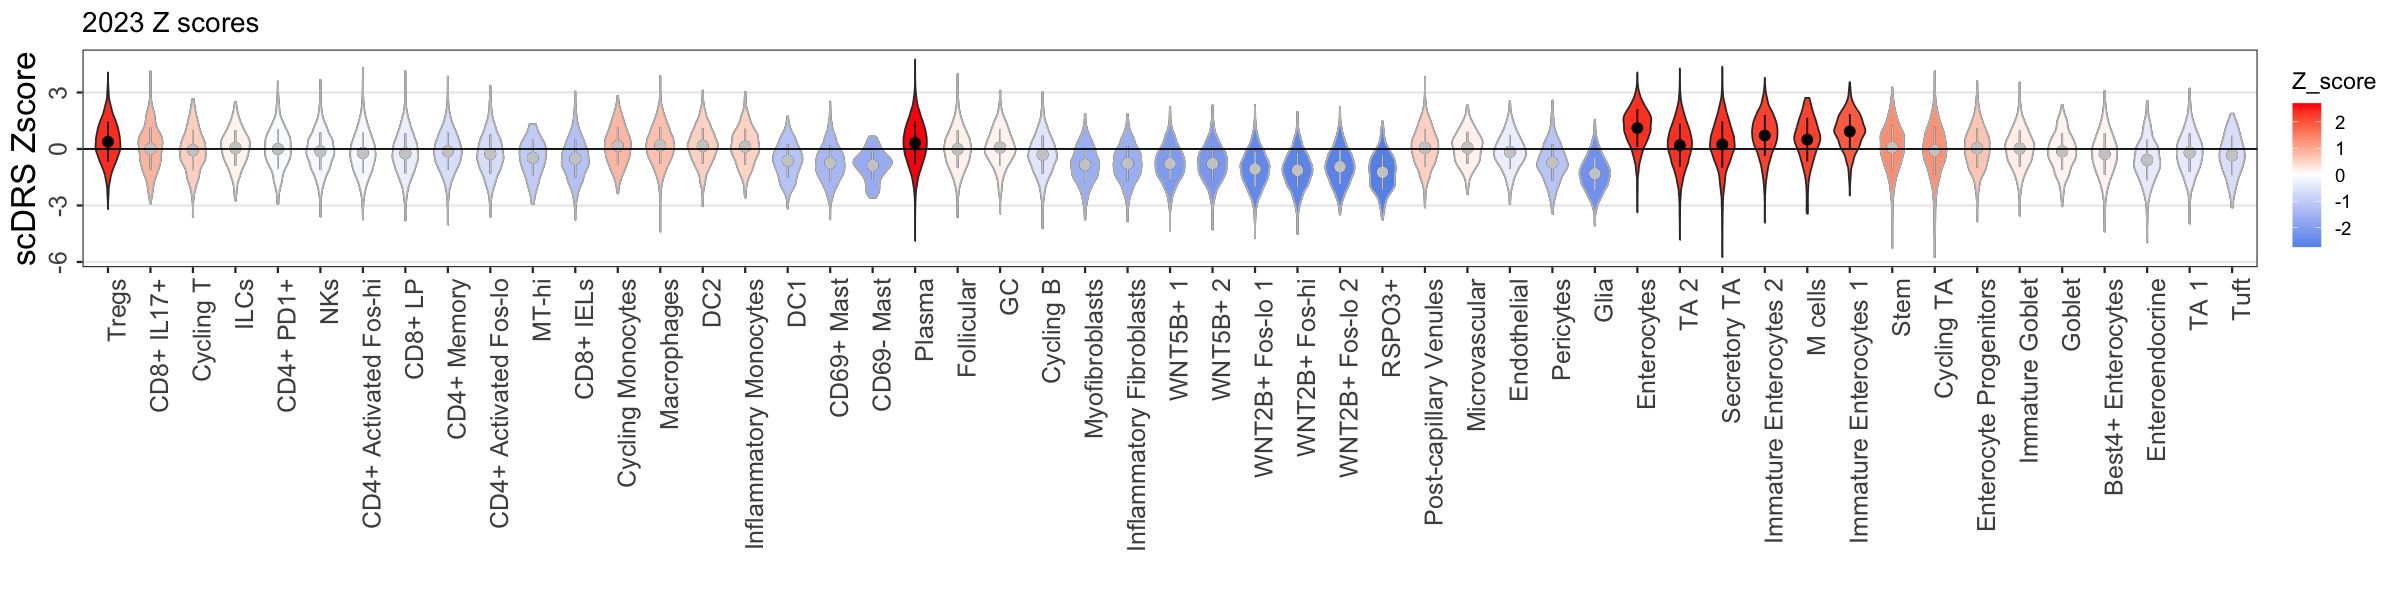

In [63]:
data2 = UC_meta_data[!UC_meta_data$uniq_cluster %in% sig_cell_clusters,]
options(repr.plot.height = 5, repr.plot.width =20 ) #[meta_data$pval < 0.1,]
ggplot(UC_meta_data, aes(x=factor(cluster, levels=rev(ranked_cell_clusters)), y=zscore, fill=Z_score)) +
geom_violin(data=UC_meta_data, linewidth=0.5) +  
geom_violin(data=data2, color="grey", linewidth=0.5, aes(fill=Z_score)) + 
stat_summary(fun.data=data_summary) + stat_summary(data=data2, fun.data=data_summary, color="grey80") + 
geom_hline(yintercept=0, color="black") +
theme_bw(base_size=14) + 
theme( 
      axis.text.x = element_text(angle=90, size=15, hjust=1), 
     panel.grid.major.x = element_blank(), panel.grid.minor.x = element_blank(), panel.grid.minor.y = element_blank(),
     axis.text.y = element_text(angle=90, size = 15,vjust=1,hjust=0.5), axis.title=element_text(size=20)) + #ylim(-6,5.3)  +
 ggtitle("2023 Z scores") + 
theme(strip.background=element_rect(colour="black",
                                    fill="lightgrey"),strip.text = element_text(size = 18, margin = margin()))  +
scale_fill_gradient2(low="cornflowerblue", mid="white", high="red", midpoint=0)  + labs(y="scDRS Zscore",x='')
ggsave("../../output//Final_figures/UC/scDRS_UC_Zscores.pdf", height=5, width=20)

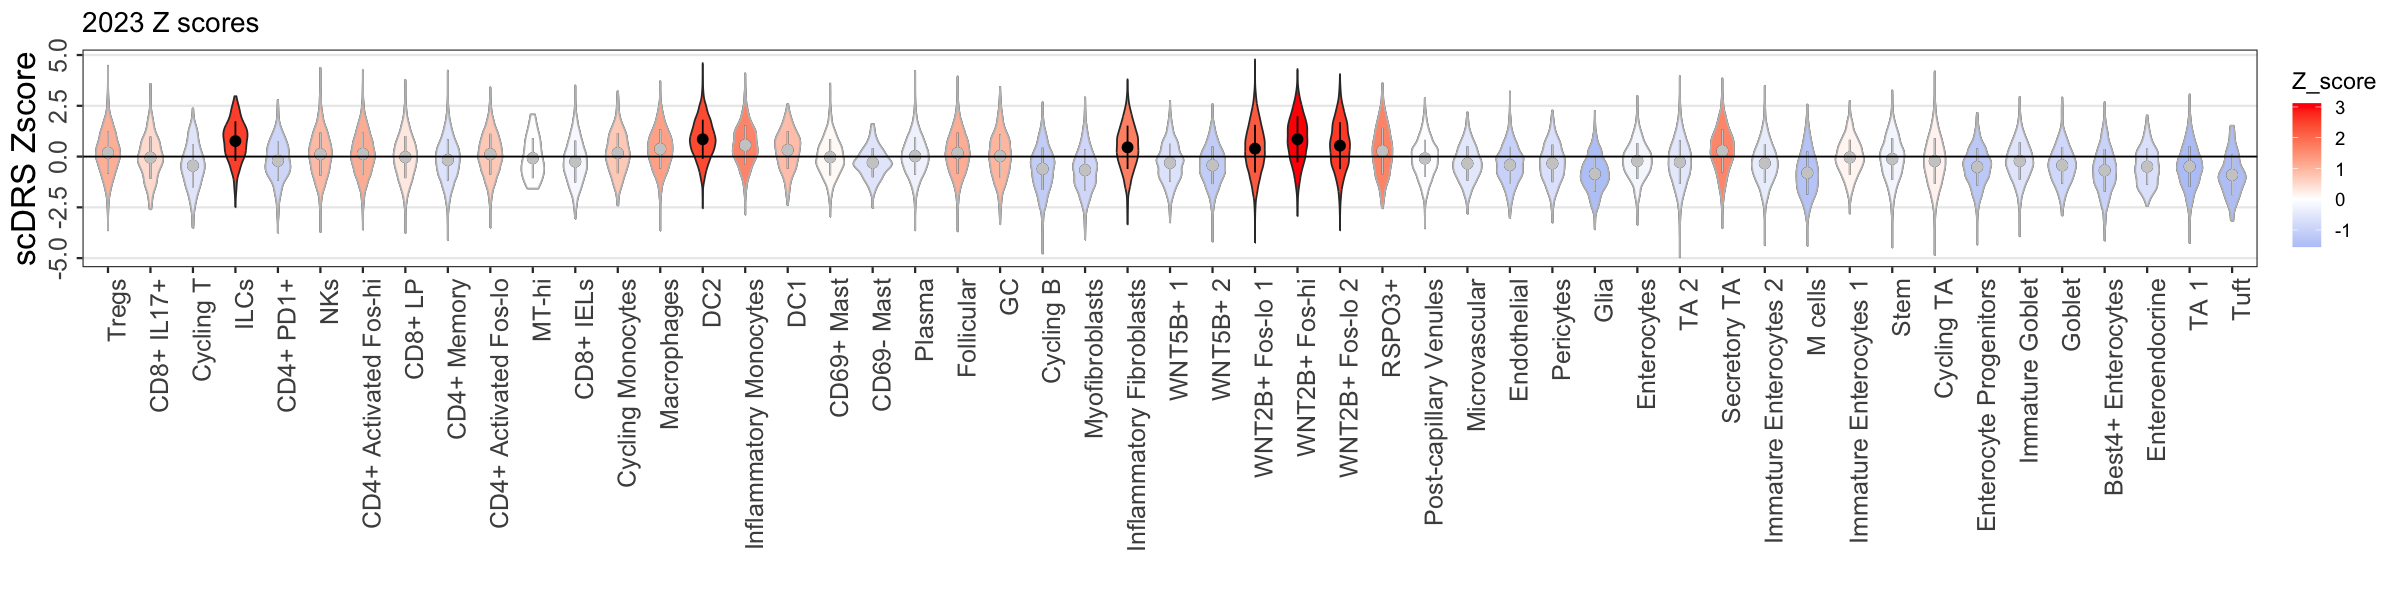

In [65]:
data2 = CD_meta_data[!CD_meta_data$uniq_cluster %in% sig_cell_clusters,]
options(repr.plot.height = 5, repr.plot.width =20 ) #[meta_data$pval < 0.1,]
ggplot(CD_meta_data, aes(x=factor(cluster, levels=rev(ranked_cell_clusters)), y=zscore, fill=Z_score)) +
geom_violin(data=CD_meta_data, linewidth=0.5) +  
geom_violin(data=data2, color="grey", linewidth=0.5, aes(fill=Z_score)) + 
stat_summary(fun.data=data_summary) + stat_summary(data=data2, fun.data=data_summary, color="grey80") + 
geom_hline(yintercept=0, color="black") +
theme_bw(base_size=14) + 
theme( 
      axis.text.x = element_text(angle=90, size=15, hjust=1), 
     panel.grid.major.x = element_blank(), panel.grid.minor.x = element_blank(), panel.grid.minor.y = element_blank(),
     axis.text.y = element_text(angle=90, size = 15,vjust=1,hjust=0.5), axis.title=element_text(size=20)) + #ylim(-6,5.3)  +
 ggtitle("2023 Z scores") + 
theme(strip.background=element_rect(colour="black",
                                    fill="lightgrey"),strip.text = element_text(size = 18, margin = margin()))  +
scale_fill_gradient2(low="cornflowerblue", mid="white", high="red", midpoint=0)  + labs(y="scDRS Zscore",x='')
ggsave("../../output//Final_figures/UC_CD/scDRS_CD_Zscores.pdf", height=5, width=20)

## Compare CD & UC [Figure 4]

In [66]:
UC_micro_table[1:2,]
setdiff(UC_micro_table$group, CD_micro_table$group)
setdiff(UC_micro_table$group, UC_micro_table$group)
setdiff(UC_micro_table$group, ranked_cell_clusters)
setdiff(ranked_cell_clusters, UC_micro_table$group)

,group,n_cell,n_ctrl,assoc_mcp,assoc_mcz,hetero_mcp,hetero_mcz,n_fdr_0.05,n_fdr_0.1,n_fdr_0.2
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Best4+ Enterocytes,1609,1000,0.3856144,0.1289141,0.044955045,1.946660,0,0,0
2,CD4+ Activated Fos-hi,8498,1000,0.5414585,-0.1576988,0.004995005,3.683181,0,0,0


character(0)

character(0)

character(0)

character(0)

In [71]:
ranked_cell_clusters

[1] "Tuft"                     "TA 1"                    
 [3] "Enteroendocrine"          "Best4+ Enterocytes"      
 [5] "Goblet"                   "Immature Goblet"         
 [7] "Enterocyte Progenitors"   "Cycling TA"              
 [9] "Stem"                     "Immature Enterocytes 1"  
[11] "M cells"                  "Immature Enterocytes 2"  
[13] "Secretory TA"             "TA 2"                    
[15] "Enterocytes"              "Glia"                    
[17] "Pericytes"                "Endothelial"             
[19] "Microvascular"            "Post-capillary Venules"  
[21] "RSPO3+"                   "WNT2B+ Fos-lo 2"         
[23] "WNT2B+ Fos-hi"            "WNT2B+ Fos-lo 1"         
[25] "WNT5B+ 2"                 "WNT5B+ 1"                
[27] "Inflammatory Fibroblasts" "Myofibroblasts"          
[29] "Cycling B"                "GC"                      
[31] "Follicular"               "Plasma"                  
[33] "CD69- Mast"               "CD69+ Mast"              
[35] "DC1"                      "Inflammatory Monocytes"  
[37] "DC2"                      "Macrophages"             
[39] "Cycling Monocytes"        "CD8+ IELs"               
[41] "MT-hi"                    "CD4+ Activated Fos-lo"   
[43] "CD4+ Memory"              "CD8+ LP"                 
[45] "CD4+ Activated Fos-hi"    "NKs"                     
[47] "CD4+ PD1+"                "ILCs"                    
[49] "Cycling T"                "CD8+ IL17+"              
[51] "Tregs"

In [73]:
meta_colors1
meta_colors_macro

[[1]]
       Immature Goblet                 Goblet                   TA 1 
             "#7D86Ba"              "#BC79AC"              "#4A69A5" 
                  TA 2             Cycling TA           Secretory TA 
             "#629F3F"              "#6A2A81"              "#CA7953" 
Immature Enterocytes 1 Immature Enterocytes 2        Enteroendocrine 
             "#C46A1F"              "#D2D05D"              "#272727" 
Enterocyte Progenitors     Best4+ Enterocytes            Enterocytes 
             "#7f4521"              "#79B193"              "#A7C6E6" 
                  Stem                   Tuft                M cells 
             "#B01C20"              "#9DBF4A"              "#878787" 

[[2]]
     Glia 
"#ba79a9" 

[[3]]
           Endothelial          Microvascular Post-capillary Venules 
             "#868686"              "#78b392"              "#c97b51" 
             Pericytes 
             "#7f87bc" 

[[4]]
         WNT2B+ Fos-lo 1          WNT2B+ Fos-lo 2            WNT2B+ Fos-hi 
               "#4b67a3"                "#66a141"                "#ae1e24" 
                WNT5B+ 1                 WNT5B+ 2           Myofibroblasts 
               "#c7661c"                "#d2d35b"                "#a5c3e2" 
                  RSPO3+ Inflammatory Fibroblasts 
               "#6f3b85"                "#7d492a" 

[[5]]
    Plasma  Cycling B Follicular         GC 
 "#A6CEE3"  "#B2DF8A"  "#FF7F00"  "#1F78B4" 

[[6]]
           Macrophages                    DC1                    DC2 
             "#A6CEE3"              "#1F78B4"              "#B2DF8A" 
            CD69+ Mast             CD69- Mast      Cycling Monocytes 
             "#33A02C"              "#FB9A99"              "#E31A1C" 
Inflammatory Monocytes 
             "#FDBF6F" 

[[7]]
                MT-hi             Cycling T                   NKs 
            "#A6CEE3"             "#1F78B4"             "#B2DF8A" 
                 ILCs             CD8+ IELs               CD8+ LP 
            "#33A02C"             "#FB9A99"             "#E31A1C" 
           CD8+ IL17+ CD4+ Activated Fos-hi CD4+ Activated Fos-lo 
            "#FDBF6F"             "#CAB2D6"             "#6A3D9A" 
          CD4+ Memory             CD4+ PD1+                 Tregs 
            "#FFFF99"             "#B15928"             "#B3E2CD"

$T_cell
[1] ""

$Myeloid
[1] ""

$Fibroblast
[1] ""

$Endothelial
[1] ""

$B_cell
[1] ""

$Epithelial
[1] ""

$Glia
[1] ""

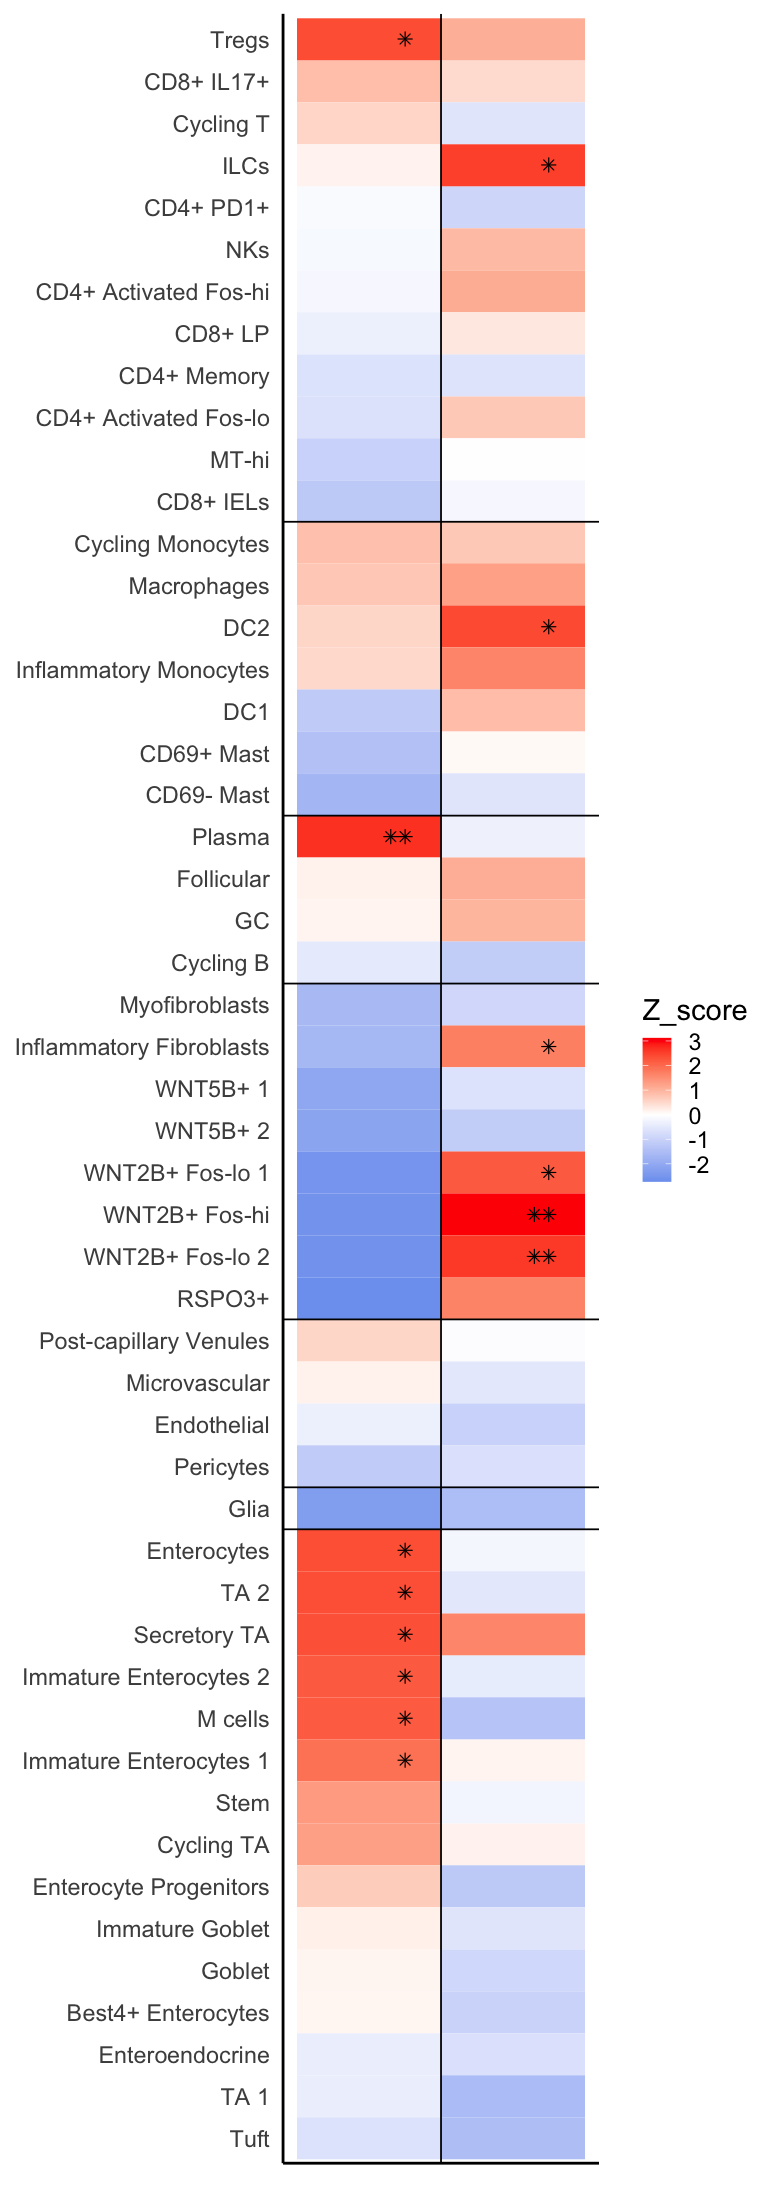

In [84]:
data <- UC_micro_table
options(repr.plot.height = nrow(data)/2.8, repr.plot.width =10 )
data2 <- CD_micro_table
#data2$group <- factor(data2$group, ranked_cell_clusters)

# 10kb
p1 <- 
    ggplot(data) + 
    geom_tile(aes(x=0.5, y=factor(group, levels=ranked_cell_clusters), fill=assoc_mcz)) + 
    scale_fill_gradient2(low="cornflowerblue", mid="white", high="red", midpoint=0) + 
    geom_point(data = data[data$assoc_mcp < 0.05,], aes(x=0.75, y=factor(group, levels=ranked_cell_clusters)), size=2.5, color='black', shape=8) + 
    geom_point(data = data[data$assoc_mcp < 0.01,], aes(x=0.65, y=factor(group, levels=ranked_cell_clusters)), size=2.5, color='black', shape=8) + 
    geom_point(data = data[data$assoc_mcp < 0.001,], aes(x=0.55, y=factor(group, levels=ranked_cell_clusters)), size=2.5, color='black', shape=8) + 
    #geom_point(data = data[data$hetero_mcp < 0.05,], aes(x=0.75, y=factor(group, levels=names(meta_colors)), size = hetero_mcz), color='black') + 
    # geom_text(data=data[data$rank_assoc_mcz<11,], aes(x=0.3, factor(group, levels=ranked_cell_clusters),
    #                                           label = rank_assoc_mcz)) +

    geom_tile(data=data2, aes(x=1.5, y=group, fill=assoc_mcz)) + 
    geom_point(data = data2[data2$assoc_mcp < 0.05,], aes(x=1.75, y=group), size=2.5, color='black', shape=8) + 
    geom_point(data = data2[data2$assoc_mcp < 0.01,], aes(x=1.65, y=group), size=2.5, color='black', shape=8) + 
    geom_point(data = data2[data2$assoc_mcp < 0.001,], aes(x=1.55, y=group), size=2.5, color='black', shape=8) + 
    theme_classic(base_size =20) + xlim(0, 2) + xlab("scGWAS   scDRS") +
    geom_vline(xintercept=1) +
    scale_y_discrete(ranked_cell_clusters) +
    # geom_text(data=data2[data2$rank_assoc_mcz<11,], aes(x=1.3, factor(group, levels=ranked_cell_clusters),
    #                                           label = rank_assoc_mcz)) +


    theme_classic(base_size =17.5) + 
    theme( 
          axis.text.x = element_blank(), legend.position="right", 
          axis.title.y = element_blank(), axis.ticks.y = element_blank(), 
         axis.ticks.x = element_blank(), axis.title.x = element_blank()) +
 geom_hline(yintercept=15.5)+geom_hline(yintercept=16.5) + geom_hline(yintercept=20.5)+  geom_hline(yintercept=39.5) + geom_hline(yintercept=32.5) + geom_hline(yintercept=28.5) +
labs(fill='Z_score') 

options(repr.plot.height = nrow(data)/2.8, repr.plot.width =6.5)
p1

In [86]:
pdf("../../output/Final_figures/UC_CD/UC_CD_hg38_53kb_12-21-23.pdf", width=6.5, height=nrow(data)/2.8)
print(p1)
dev.off()

pdf 
  2

## 5. Check how results compare if using 10kb-10kb MAGMA window (original is 50-35) [Supplementary Figure 7]

In [87]:
output_dir <- "/Users/hopekirby/Desktop/SC_GWAS_Bench/output/SCDRS/CD_10_dec/"
output_dir2 <- "/Users/hopekirby/Desktop/SC_GWAS_Bench/output/SCDRS/UC_10_dec/"
CD_micro_table_10 <- data.frame(fread(paste0(output_dir, "CD.scdrs_group.cell_type_micro")))
UC_micro_table_10 <- data.frame(fread(paste0(output_dir2, "UC.scdrs_group.cell_type_micro")))


In [40]:
sig_cell_clusters_ <- RA_micro_table[RA_micro_table$assoc_mcp < 0.05,]$group2
length(sig_cell_clusters_RA)
add_prefix <- function(name) {paste0("RA_", name)}
sig_cell_clusters_10 <- lapply(sig_cell_clusters_RA, add_prefix)

add_prefix <- function(name) {paste0("SA_", name)}

sig_cell_clusters_SA_10 <- SA_micro_table_10[SA_micro_table_10$assoc_mcp < 0.05,]$group2
length(sig_cell_clusters_SA_10)
sig_cell_clusters_10 <- c(sig_cell_clusters_10, lapply(sig_cell_clusters_SA_10, add_prefix))
length(sig_cell_clusters_10)

[1] 46

[1] 16

[1] 62

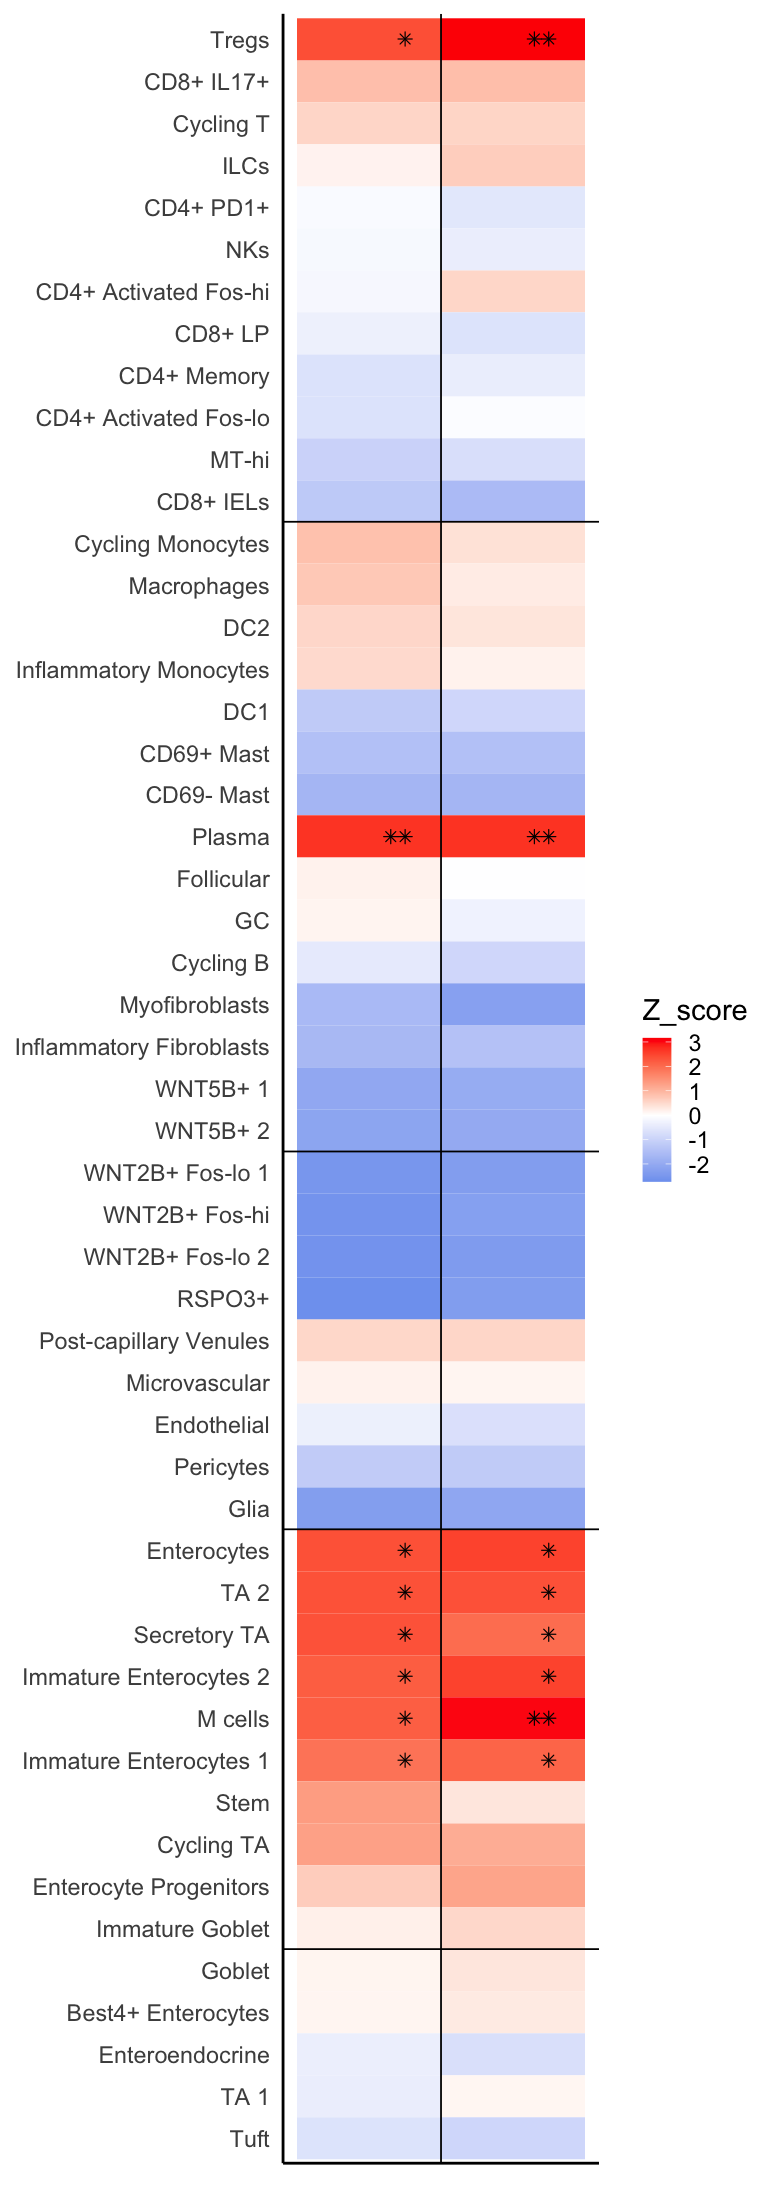

In [93]:
data <- UC_micro_table
options(repr.plot.height = nrow(data)/2.8, repr.plot.width =10 )
data2 <- UC_micro_table_10
#data2$group <- factor(data2$group, ranked_cell_clusters)

# 10kb
p1 <- 
    ggplot(data) + 
    geom_tile(aes(x=0.5, y=factor(group, levels=ranked_cell_clusters), fill=assoc_mcz)) + 
    scale_fill_gradient2(low="cornflowerblue", mid="white", high="red", midpoint=0) + 
    geom_point(data = data[data$assoc_mcp < 0.05,], aes(x=0.75, y=factor(group, levels=ranked_cell_clusters)), size=2.5, color='black', shape=8) + 
    geom_point(data = data[data$assoc_mcp < 0.01,], aes(x=0.65, y=factor(group, levels=ranked_cell_clusters)), size=2.5, color='black', shape=8) + 
    geom_point(data = data[data$assoc_mcp < 0.001,], aes(x=0.55, y=factor(group, levels=ranked_cell_clusters)), size=2.5, color='black', shape=8) + 
    #geom_point(data = data[data$hetero_mcp < 0.05,], aes(x=0.75, y=factor(group, levels=names(meta_colors)), size = hetero_mcz), color='black') + 
    # geom_text(data=data[data$rank_assoc_mcz<11,], aes(x=0.3, factor(group, levels=ranked_cell_clusters),
    #                                           label = rank_assoc_mcz)) +

    geom_tile(data=data2, aes(x=1.5, y=group, fill=assoc_mcz)) + 
    geom_point(data = data2[data2$assoc_mcp < 0.05,], aes(x=1.75, y=group), size=2.5, color='black', shape=8) + 
    geom_point(data = data2[data2$assoc_mcp < 0.01,], aes(x=1.65, y=group), size=2.5, color='black', shape=8) + 
    geom_point(data = data2[data2$assoc_mcp < 0.001,], aes(x=1.55, y=group), size=2.5, color='black', shape=8) + 
    theme_classic(base_size =20) + xlim(0, 2) + xlab("scGWAS   scDRS") +
    geom_vline(xintercept=1) +
    scale_y_discrete(ranked_cell_clusters) +
    # geom_text(data=data2[data2$rank_assoc_mcz<11,], aes(x=1.3, factor(group, levels=ranked_cell_clusters),
    #                                           label = rank_assoc_mcz)) +


    theme_classic(base_size =17.5) + 
    theme( 
          axis.text.x = element_blank(), legend.position="right", 
          axis.title.y = element_blank(), axis.ticks.y = element_blank(), 
         axis.ticks.x = element_blank(), axis.title.x = element_blank()) +
    geom_hline(yintercept=5.5) + geom_hline(yintercept=15.5)+ geom_hline(yintercept=24.5)+ geom_hline(yintercept=39.5)+ geom_hline(yintercept=53.5) + 
labs(fill='Z_score') 
# p2 <- ggplot(data) + geom_bar(data=micro_table, aes(x=n_cell, y=factor(group, levels=ranked_cell_clusters)), stat="identity")  +
# theme_classic(base_size =17.5) + 
# #geom_vline(xintercept=2) +
# #scale_fill_gradient(low="white", high="grey") + 
# geom_text(data=micro_table[micro_table$n_cell < 500,], aes(x=1500, y=factor(group, levels=ranked_cell_clusters), label=n_cell), size=5) +
# scale_y_discrete(ranked_cell_clusters) + 
# theme(axis.text.x = element_blank(), legend.position="right", axis.text.y = element_blank(),
#       axis.title.y = element_blank(), axis.ticks.y = element_blank(), 
#      axis.ticks.x = element_blank(), axis.title.x = element_blank())#axis.text.x = element_text(angle=90),
# #scale_fill_gradient(low="white", high="grey") + 
# #geom_text(data=micro_table[micro_table$n_cell < 100,], aes(x=400, y=factor(group, levels=ranked_cell_clusters), label=n_cell)) +
# #scale_y_discrete(ranked_cell_clusters) 
options(repr.plot.height = nrow(data)/2.8, repr.plot.width =6.5)
p1

In [97]:
UC_micro_table[1:2,]
CD_micro_table[1:2,]

,group,n_cell,n_ctrl,assoc_mcp,assoc_mcz,hetero_mcp,hetero_mcz,n_fdr_0.05,n_fdr_0.1,n_fdr_0.2
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Best4+ Enterocytes,1609,1000,0.3856144,0.1289141,0.044955045,1.946660,0,0,0
2,CD4+ Activated Fos-hi,8498,1000,0.5414585,-0.1576988,0.004995005,3.683181,0,0,0


,group,n_cell,n_ctrl,assoc_mcp,assoc_mcz,hetero_mcp,hetero_mcz,n_fdr_0.05,n_fdr_0.1,n_fdr_0.2
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Best4+ Enterocytes,1609,1000,0.8681319,-0.9868861,0.06793207,1.657361,0,0,0
2,CD4+ Activated Fos-hi,8498,1000,0.1398601,1.1019320,0.02697303,2.328255,0,0,0


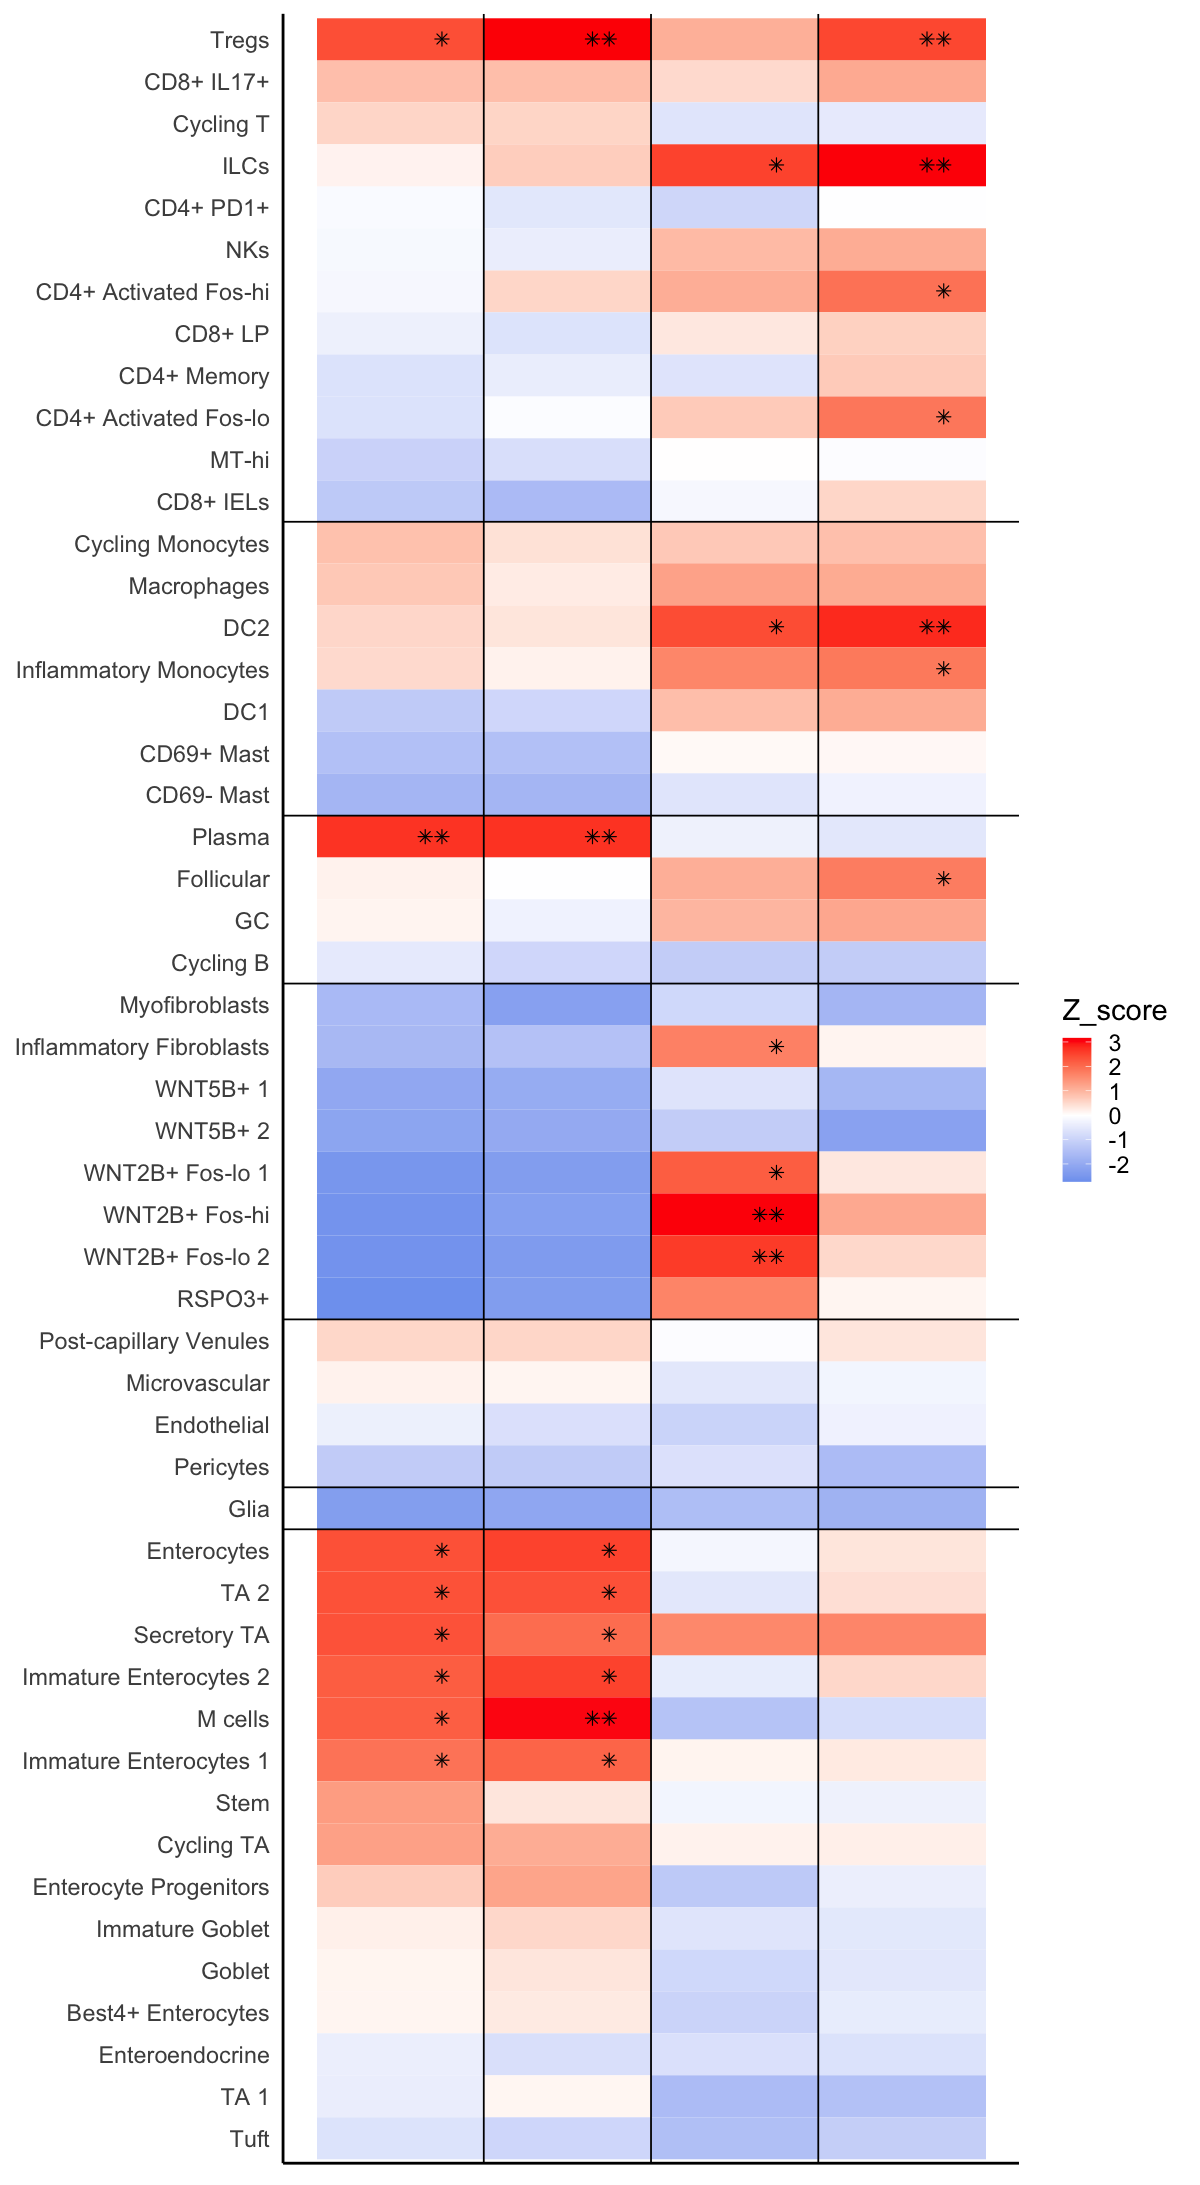

In [109]:
data <- UC_micro_table
data2 <- UC_micro_table_10
data3 <- CD_micro_table
data4 <- CD_micro_table_10
#data2$group <- factor(data2$group, ranked_cell_clusters)

# 10kb
p1 <- 
    ggplot(data) + 
    geom_tile(aes(x=0.5, y=factor(group, levels=ranked_cell_clusters), fill=assoc_mcz)) + 
    scale_fill_gradient2(low="cornflowerblue", mid="white", high="red", midpoint=0) + 
    geom_point(data = data[data$assoc_mcp < 0.05,], aes(x=0.75, y=factor(group, levels=ranked_cell_clusters)), size=2.5, color='black', shape=8) + 
    geom_point(data = data[data$assoc_mcp < 0.01,], aes(x=0.65, y=factor(group, levels=ranked_cell_clusters)), size=2.5, color='black', shape=8) + 
    geom_point(data = data[data$assoc_mcp < 0.001,], aes(x=0.55, y=factor(group, levels=ranked_cell_clusters)), size=2.5, color='black', shape=8) + 
    #geom_point(data = data[data$hetero_mcp < 0.05,], aes(x=0.75, y=factor(group, levels=names(meta_colors)), size = hetero_mcz), color='black') + 
    # geom_text(data=data[data$rank_assoc_mcz<11,], aes(x=0.3, factor(group, levels=ranked_cell_clusters),
    #                                           label = rank_assoc_mcz)) +

    geom_tile(data=data2, aes(x=1.5, y=group, fill=assoc_mcz)) + 
    geom_point(data = data2[data2$assoc_mcp < 0.05,], aes(x=1.75, y=group), size=2.5, color='black', shape=8) + 
    geom_point(data = data2[data2$assoc_mcp < 0.01,], aes(x=1.65, y=group), size=2.5, color='black', shape=8) + 
    geom_point(data = data2[data2$assoc_mcp < 0.001,], aes(x=1.55, y=group), size=2.5, color='black', shape=8) + 
    theme_classic(base_size =20)  + xlab("scGWAS   scDRS") +
    geom_vline(xintercept=1) +

 geom_tile(data=data3, aes(x=2.5, y=group, fill=assoc_mcz)) + 
    geom_point(data = data3[data3$assoc_mcp < 0.05,], aes(x=2.75, y=group), size=2.5, color='black', shape=8) + 
    geom_point(data = data3[data3$assoc_mcp < 0.01,], aes(x=2.65, y=group), size=2.5, color='black', shape=8) + 
    geom_point(data = data3[data3$assoc_mcp < 0.001,], aes(x=2.55, y=group), size=2.5, color='black', shape=8) + 
    theme_classic(base_size =20)  + xlab("scGWAS   scDRS") +
    geom_vline(xintercept=2) +


 geom_tile(data=data4, aes(x=3.5, y=group, fill=assoc_mcz)) + 
    geom_point(data = data4[data4$assoc_mcp < 0.05,], aes(x=3.75, y=group), size=2.5, color='black', shape=8) + 
    geom_point(data = data4[data4$assoc_mcp < 0.01,], aes(x=3.65, y=group), size=2.5, color='black', shape=8) + 
    geom_point(data = data4[data4$assoc_mcp < 0.001,], aes(x=3.55, y=group), size=2.5, color='black', shape=8) + 
    theme_classic(base_size =20) + xlim(0, 4) + xlab("scGWAS   scDRS") +
    geom_vline(xintercept=3) +
    scale_y_discrete(ranked_cell_clusters) +



    theme_classic(base_size =17.5) + 
    theme( 
          axis.text.x = element_blank(), legend.position="right", 
          axis.title.y = element_blank(), axis.ticks.y = element_blank(), 
         axis.ticks.x = element_blank(), axis.title.x = element_blank()) +
    geom_hline(yintercept=16.5) + geom_hline(yintercept=15.5)+ geom_hline(yintercept=20.5)+ geom_hline(yintercept=28.5)+ geom_hline(yintercept=39.5)+ geom_hline(yintercept=32.5) + 
labs(fill='Z_score') 

options(repr.plot.height = nrow(data)/2.8, repr.plot.width =10)
p1

In [110]:
pdf("../../output/Final_figures/UC_CD/UC_CD_10kb_53kb_12-23-23.pdf", width=10, height=nrow(data)/2.8)
print(p1)
dev.off()

pdf 
  2